# 1. 선형모형 추정

In [212]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from google.colab import drive

# CSV 파일 다운로드 링크
url1 = "https://drive.google.com/uc?id=1uTwSo_yDN85xAZ6Xud5UMjF5sYyKWllU"

# CSV 파일을 pd 를 이용해서 읽어옴
dat1 = pd.read_csv(url1, header=None)

# x1과 y_noise1을 각각 독립변수와 종속변수로 사용
x1 = torch.tensor(dat1[0].values.reshape([len(dat1),1]), dtype=torch.float32)
y_noise1 = torch.tensor(dat1[1].values.reshape([len(dat1),1]), dtype=torch.float32)

# 1) 데이터 확인

  - 주어진 데이터에 포함되어 있는 변수가 몇 개인지, 총 표본의 크기가 얼마인지 확인
  - 변수간의 형태를 확인하기 위해서 산점도를 그려서 확인

In [213]:
dat1.count()

0    1000
1    1000
dtype: int64

In [214]:
dat1.shape

(1000, 2)

In [215]:
dat1.head()

,0,1
0,7.645385,25.281322
1,8.300079,26.786081
2,-2.342725,-5.060891
3,9.186113,36.149471
4,-2.191036,-1.612878


<Axes: xlabel='0', ylabel='1'>

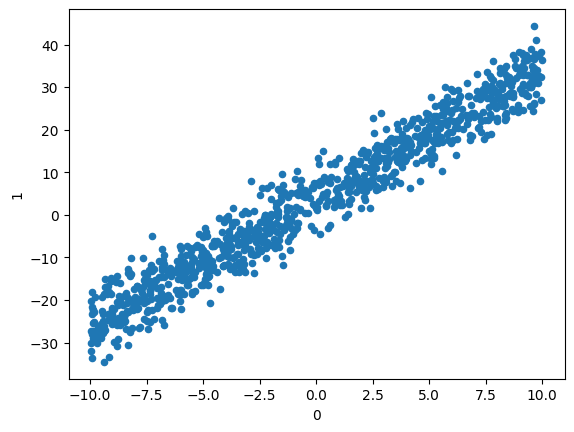

In [216]:
dat1.plot(x=0, y=1, kind='scatter')

#2) 모형 설정

- 입력변수의 개수가 1개, 출력변수의 개수가 1이며 편차를 포함하는 선형 모델을 생성

In [217]:
model1 = nn.Linear(1, 1, bias=True)
model2 = nn.Linear(1, 1, bias=True)

# 3) 모형 학습

  - 손실함수(loss function)을 L1인 경우와 최소제곱오차(MSE)인 경우를 모두 확인
  - 최적화(optimization)은 SGD를 사용
  - 학습횟수(epoch)는 제약은 없으나 모형의 파라미터 값들이 충분히 학습되도록 설정
    (힌트: loss의 변화를 통해서 확인)
  - 손실의 변화를 확인하기 위해 손실을 저장하며, 동시에 학습횟수 10번마다 손실을 출력
    (L1과 MSE 각각의 경우에 대해서 출력)

In [218]:
loss1_fn = nn.L1Loss()
loss1_array = []

mse_fn = nn.MSELoss()
mse_array = []

optimizer1 = optim.SGD(model1.parameters(), lr=0.01)
optimizer2 = optim.SGD(model2.parameters(), lr=0.01)

In [219]:
for i in range(7000):
    optimizer1.zero_grad()
    output1 = model1(x1)

    loss1 = loss1_fn(output1, y_noise1)
    loss1.backward()
    optimizer1.step()
    loss1_array.append(loss1.data)

    if i %10 ==0:
        print("L1:", loss1.data) #10번 반복마다 손실 출력

L1: tensor(12.4310)
L1: tensor(10.2205)
L1: tensor(8.2537)
L1: tensor(6.7832)
L1: tensor(5.8599)
L1: tensor(5.3089)
L1: tensor(4.9891)
L1: tensor(4.8181)
L1: tensor(4.7354)
L1: tensor(4.6798)
L1: tensor(4.6360)
L1: tensor(4.5941)
L1: tensor(4.5547)
L1: tensor(4.5165)
L1: tensor(4.4794)
L1: tensor(4.4441)
L1: tensor(4.4093)
L1: tensor(4.3754)
L1: tensor(4.3421)
L1: tensor(4.3091)
L1: tensor(4.2766)
L1: tensor(4.2450)
L1: tensor(4.2138)
L1: tensor(4.1826)
L1: tensor(4.1526)
L1: tensor(4.1234)
L1: tensor(4.0953)
L1: tensor(4.0680)
L1: tensor(4.0416)
L1: tensor(4.0161)
L1: tensor(3.9911)
L1: tensor(3.9665)
L1: tensor(3.9424)
L1: tensor(3.9189)
L1: tensor(3.8960)
L1: tensor(3.8735)
L1: tensor(3.8514)
L1: tensor(3.8301)
L1: tensor(3.8095)
L1: tensor(3.7898)
L1: tensor(3.7709)
L1: tensor(3.7523)
L1: tensor(3.7347)
L1: tensor(3.7184)
L1: tensor(3.7028)
L1: tensor(3.6877)
L1: tensor(3.6728)
L1: tensor(3.6582)
L1: tensor(3.6445)
L1: tensor(3.6312)
L1: tensor(3.6185)
L1: tensor(3.6064)
L1: tensor

In [220]:
for i in range(500):
    optimizer2.zero_grad()
    output2 = model2(x1)

    mse = mse_fn(output2, y_noise1)
    mse.backward()
    optimizer2.step()
    mse_array.append(mse.data)

    if i %10 ==0:
        print("MSE:", mse.data) #10번 반복마다 손실 출력

MSE: tensor(268.9336)
MSE: tensor(22.7791)
MSE: tensor(20.8145)
MSE: tensor(19.5017)
MSE: tensor(18.6245)
MSE: tensor(18.0383)
MSE: tensor(17.6466)
MSE: tensor(17.3848)
MSE: tensor(17.2099)
MSE: tensor(17.0930)
MSE: tensor(17.0149)
MSE: tensor(16.9627)
MSE: tensor(16.9278)
MSE: tensor(16.9045)
MSE: tensor(16.8889)
MSE: tensor(16.8785)
MSE: tensor(16.8716)
MSE: tensor(16.8669)
MSE: tensor(16.8638)
MSE: tensor(16.8617)
MSE: tensor(16.8604)
MSE: tensor(16.8594)
MSE: tensor(16.8588)
MSE: tensor(16.8584)
MSE: tensor(16.8581)
MSE: tensor(16.8579)
MSE: tensor(16.8578)
MSE: tensor(16.8577)
MSE: tensor(16.8577)
MSE: tensor(16.8576)
MSE: tensor(16.8576)
MSE: tensor(16.8576)
MSE: tensor(16.8576)
MSE: tensor(16.8576)
MSE: tensor(16.8576)
MSE: tensor(16.8576)
MSE: tensor(16.8576)
MSE: tensor(16.8576)
MSE: tensor(16.8576)
MSE: tensor(16.8576)
MSE: tensor(16.8576)
MSE: tensor(16.8576)
MSE: tensor(16.8576)
MSE: tensor(16.8576)
MSE: tensor(16.8576)
MSE: tensor(16.8576)
MSE: tensor(16.8576)
MSE: tensor(

# 4) 모형 확인

  - 손실을 출력
  - 학습을 통해 얻은 파라미터를 출력
  - 데이터를 검은색, l1 손실을 사용한 모델의 결과를 빨간색, MSE 손실을 사용한 모델의 결과를 파란색으로 하나의 산점도 위에 출력해서 결과를 확인

In [221]:
print("L1:",loss1)
print("MSE:",mse)

L1: tensor(3.2997, grad_fn=<MeanBackward0>)
MSE: tensor(16.8576, grad_fn=<MseLossBackward0>)


In [222]:
param_list1 = list(model1.parameters())
print("L1 Weight:",param_list1[0].item(), "L1 Bias:", param_list1[1].item())

param_list2 = list(model2.parameters())
print("MSE Weight:",param_list2[0].item(), "MSE Weight:", param_list2[1].item())

L1 Weight: 3.003680944442749 L1 Bias: 3.8301548957824707
MSE Weight: 3.0012881755828857 MSE Weight: 3.8734922409057617


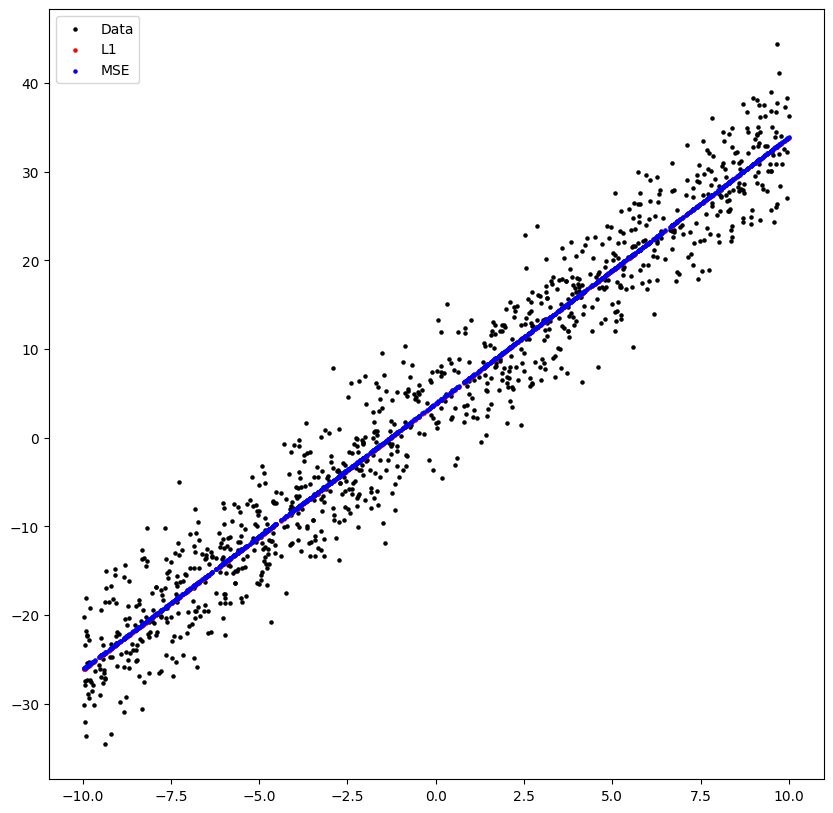

In [223]:
plt.figure(figsize=(10,10))
plt.scatter(x1.numpy(),y_noise1.numpy(),s=5,c="black",label="Data")
plt.scatter(x1.numpy(),output1.detach().numpy(), s=5, c='red',label="L1")
plt.scatter(x1.numpy(), output2.detach().numpy(), s=5, c='blue',label="MSE")
plt.legend()
plt.show()

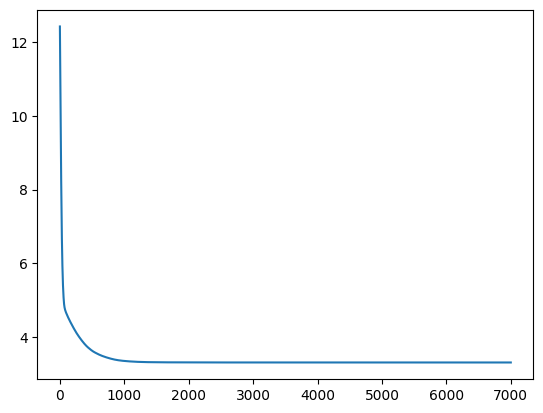

In [224]:
# 추가
plt.plot(loss1_array)
plt.show()


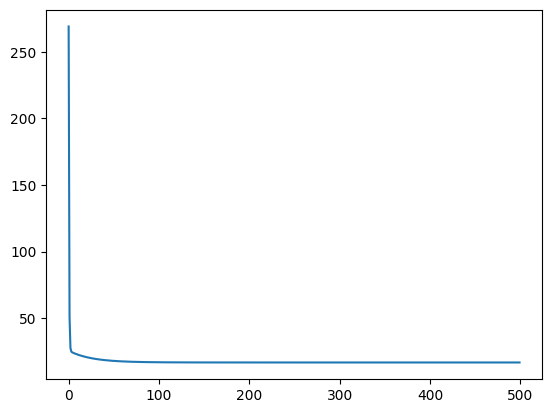

In [225]:
plt.plot(mse_array)
plt.show()

# 2. 주어진 데이터를 설명하는 모형

In [226]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np
from google.colab import drive

# CSV 파일 다운로드 링크
url2 = "https://drive.google.com/uc?id=1-7xgHN8esqF4Po43RFhdcgauWrNIKyXx"

# CSV 파일을 pd를 이용해서 읽어옴
dat2 = pd.read_csv(url2, header=None)

# x2과 y_noise2를 각각 독립변수와 종속변수로 사용
x2 = torch.tensor(dat2[0].values.reshape([len(dat2), 1]), dtype=torch.float32)
y_noise2 = torch.tensor(dat2[1].values.reshape([len(dat2), 1]), dtype=torch.float32)


#1)데이터 확인
- 변수의 갯수 및 표본의 크기 확인
- 변수들 사이의 관계 확인

In [227]:
dat2.count()

0    2000
1    2000
dtype: int64

In [228]:
dat2.shape

(2000, 2)

In [229]:
dat2.head()

,0,1
0,-4.391574,31.474882
1,18.839851,71.919777
2,10.503469,12.355599
3,16.963875,58.995560
4,-8.484745,73.375854


<Axes: xlabel='0', ylabel='1'>

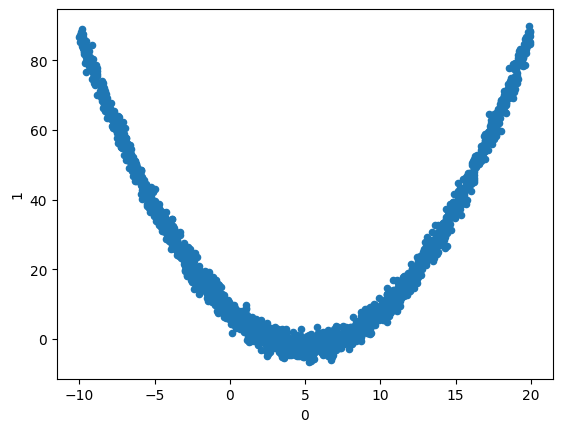

In [230]:
dat2.plot(x=0, y=1, kind='scatter')

#2) 모형설정
- 인공신경망 모형 생성
- 은닉층은 총 3개 층
- 입력값 1개 / 출력값 1개
- 은닉층 별 노드의 개수
    - 첫번째 은닉층 : 10개
    - 두번째 은닉층 : 8개
    - 세번째 은닉층 : 4개

In [231]:
model = nn.Sequential(
    nn.Linear(1, 10), #input->hid1
    nn.ReLU(),
    nn.Linear(10, 8), #hid1->hid2
    nn.ReLU(),
    nn.Linear(8, 4), #hid2->hid3
    nn.ReLU(),
    nn.Linear(4, 1) #hid3->output
)

#3)모형 학습
- 손실함수는 MSE를 사용
- 최적화 함수로는 SGD를 사용
- 학습횟수(epoch)는 제약은 없으나 모형의 파라미터 값들이 충분히 학습되도록 설정 (힌트: MSE 손실이 두자릿수까지 감소 확인할 수 있음)
- 모형의 학습과정을 확인하기 위해서 손실을 저장
    - 매 100번의 학습마다 손실을 출력

In [232]:
loss_fn = nn.MSELoss()
loss_array = []
optimizer = optim.SGD(model.parameters(), lr=0.0002)

In [233]:
for i in range(20000):
    optimizer.zero_grad()
    output = model(x2)
    loss = loss_fn(output, y_noise2)
    loss.backward()
    optimizer.step()

    loss_array.append(loss.data)

    if i%100 == 0:
        print("MSE:", loss.data)

MSE: tensor(1471.0930)
MSE: tensor(832.5568)
MSE: tensor(788.0758)
MSE: tensor(688.2652)
MSE: tensor(834.9931)
MSE: tensor(696.7611)
MSE: tensor(690.5661)
MSE: tensor(686.2980)
MSE: tensor(598.3151)
MSE: tensor(382.8958)
MSE: tensor(207.2404)
MSE: tensor(438.8838)
MSE: tensor(448.6257)
MSE: tensor(268.2445)
MSE: tensor(72.8882)
MSE: tensor(61.4825)
MSE: tensor(63.8046)
MSE: tensor(177.0924)
MSE: tensor(291.7712)
MSE: tensor(339.0869)
MSE: tensor(323.1562)
MSE: tensor(51.6536)
MSE: tensor(52.0333)
MSE: tensor(44.5531)
MSE: tensor(48.5609)
MSE: tensor(54.8523)
MSE: tensor(76.2795)
MSE: tensor(66.9716)
MSE: tensor(62.3440)
MSE: tensor(64.8888)
MSE: tensor(60.6171)
MSE: tensor(58.7863)
MSE: tensor(55.9792)
MSE: tensor(54.4328)
MSE: tensor(58.3302)
MSE: tensor(58.0805)
MSE: tensor(59.4370)
MSE: tensor(57.3102)
MSE: tensor(52.8828)
MSE: tensor(51.3794)
MSE: tensor(51.0115)
MSE: tensor(51.2115)
MSE: tensor(54.4596)
MSE: tensor(54.3733)
MSE: tensor(53.7473)
MSE: tensor(53.3219)
MSE: tensor(53.

#4) 모형확인
- 손실 출력
- 학습을 통해 얻은 파라미터를 출력
- 데이터를 검은색, MSE 손실을 사용한 모델의 결과를 파란색으로 하나의 산점도 위에 출력해서 결과를 확인

In [234]:
print(loss.data)

tensor(15.3379)


In [235]:
param_list = list(model.parameters())
print("Weight:",param_list[0].data, "\nBias:", param_list[1].data)

Weight: tensor([[ 0.0257],
        [-0.6315],
        [-0.1265],
        [ 0.0227],
        [-0.1212],
        [-0.3426],
        [ 1.1881],
        [-0.0050],
        [-0.0967],
        [-0.4760]]) 
Bias: tensor([ -1.1554,  -0.2694,   0.2840,  -1.0253,   2.3636,  -1.6769, -12.0957,
         -0.9767,   1.8951,   1.3733])


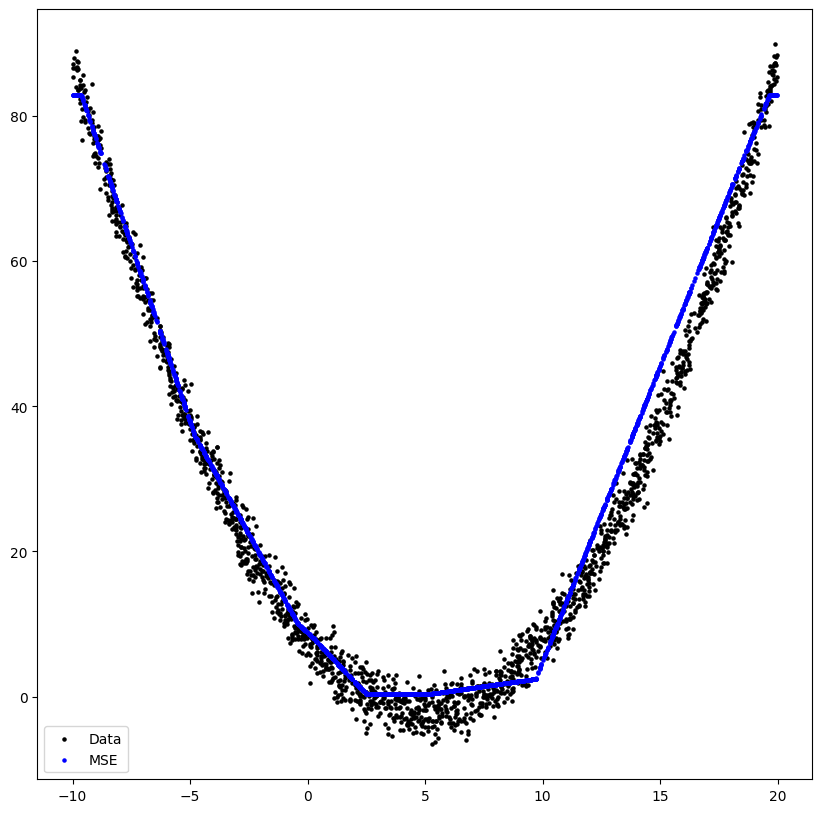

In [236]:
plt.figure(figsize=(10,10))
plt.scatter(x2.numpy(),y_noise2.numpy(),s=5,c="black",label="Data")
plt.scatter(x2.numpy(), output.detach().numpy(), s=5, c='blue',label="MSE")
plt.legend()
plt.show()